In [67]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from torch import nn, optim


In [68]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [69]:
data = pd.read_csv('data.csv')

In [70]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
pixels = list(data.columns)
pixels.remove('label')
pixels[:10]

['pixel0',
 'pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9']

In [72]:
X = data[pixels]
X

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
Y = data['label']
Y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [74]:
X = X.values
Y = Y.values


In [75]:
X = X.reshape(-1, 28, 28)

In [76]:
X.shape

(42000, 28, 28)

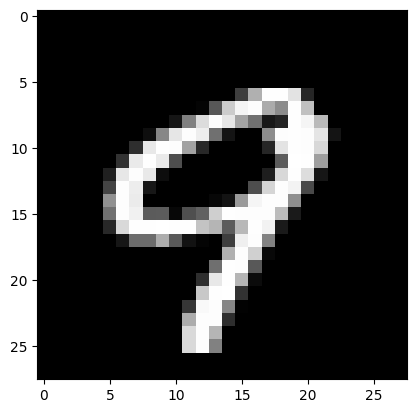

In [77]:
plt.imshow(X[100], cmap = 'gray')

In [78]:
Y[100]

9

In [79]:
  from sklearn.model_selection import train_test_split
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
X_train.shape

(33600, 28, 28)

In [81]:
X_test.shape

(8400, 28, 28)

In [82]:
output_size = 10

model = nn.Sequential(
    nn.Conv2d(1, 10, kernel_size=5),
    nn.MaxPool2d(2),
    nn.BatchNorm2d(10),
    nn.ReLU(),
    nn.Conv2d(10, 20, kernel_size=5),
    nn.MaxPool2d(2),
    nn.BatchNorm2d(20),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(320, 10),
    nn.BatchNorm1d(10),
    nn.Softmax(dim=1)
    ).to(device)
                      

In [83]:
print(model)

Sequential(
  (0): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): BatchNorm2d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): ReLU()
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=320, out_features=10, bias=True)
  (10): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): Softmax(dim=1)
)


In [84]:
criterion = nn.NLLLoss()

In [85]:
batch_size = 64


In [86]:
from torch.utils.data import DataLoader
data = [[X_train[i], Y_train[i]] for i in range(len(X_train))]
data_iterator = DataLoader(data, batch_size)


In [87]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epoches = 15
for e in range(epoches):
  epoch_loss = 0
  for images, labels in data_iterator:
    images = images.reshape((batch_size, 1, 28, 28))
    images = torch.tensor(images)
    output = model(images.float().to(device))
    loss = criterion(output, torch.tensor(labels).to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_loss += loss.item()
  print(f'epoch: {e}, loss: {epoch_loss}')
  


<ipython-input-87-ce9fdb011b4b>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  images = torch.tensor(images)
<ipython-input-87-ce9fdb011b4b>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = criterion(output, torch.tensor(labels).to(device))


epoch: 0, loss: -341.9170196428895
epoch: 1, loss: -440.041461288929
epoch: 2, loss: -467.19926595687866
epoch: 3, loss: -480.2788434624672
epoch: 4, loss: -488.0363864302635
epoch: 5, loss: -493.24161690473557
epoch: 6, loss: -497.01138639450073
epoch: 7, loss: -499.9107328057289
epoch: 8, loss: -502.2110829949379
epoch: 9, loss: -504.07952439785004
epoch: 10, loss: -505.62545853853226
epoch: 11, loss: -506.9627014994621
epoch: 12, loss: -508.1188421845436
epoch: 13, loss: -509.13853085041046
epoch: 14, loss: -510.0311282277107


In [88]:
predictions = model(torch.tensor(X_test.reshape((len(X_test), 1, 28, 28))).float().to(device))

In [90]:
predictions

tensor([[1.6650e-04, 9.6340e-05, 9.2211e-04,  ..., 1.1061e-04, 9.9798e-01,
         5.8287e-04],
        [2.4440e-04, 9.9533e-01, 6.4724e-04,  ..., 9.1728e-04, 4.3457e-04,
         6.4880e-04],
        [1.1192e-04, 3.2176e-04, 2.1535e-04,  ..., 2.5815e-04, 6.6468e-05,
         9.9807e-01],
        ...,
        [3.5460e-05, 1.9938e-05, 8.9946e-05,  ..., 3.5819e-05, 5.7471e-05,
         1.9543e-05],
        [9.8705e-01, 2.8581e-04, 6.4585e-03,  ..., 2.0458e-03, 4.9392e-04,
         4.1616e-04],
        [5.0904e-04, 2.7676e-05, 8.6050e-05,  ..., 4.3814e-05, 4.9910e-05,
         9.9822e-01]], grad_fn=<SoftmaxBackward0>)

In [92]:
predictions.shape

torch.Size([8400, 10])

In [93]:
predictions = predictions.tolist()

In [94]:
predictions_labels = [prediction.index(max(prediction)) for prediction in predictions]

In [95]:
predictions_labels

[8,
 1,
 9,
 9,
 8,
 6,
 2,
 2,
 7,
 1,
 6,
 3,
 1,
 2,
 7,
 4,
 3,
 3,
 6,
 4,
 5,
 5,
 2,
 6,
 0,
 0,
 0,
 8,
 6,
 3,
 6,
 6,
 1,
 7,
 8,
 6,
 7,
 3,
 6,
 1,
 9,
 7,
 9,
 6,
 8,
 3,
 4,
 2,
 7,
 8,
 4,
 3,
 3,
 7,
 1,
 2,
 1,
 2,
 9,
 6,
 4,
 0,
 4,
 8,
 5,
 5,
 4,
 3,
 9,
 3,
 9,
 4,
 2,
 8,
 1,
 6,
 3,
 7,
 0,
 3,
 1,
 7,
 6,
 7,
 6,
 1,
 9,
 5,
 3,
 6,
 9,
 3,
 7,
 6,
 6,
 5,
 2,
 9,
 3,
 5,
 4,
 6,
 0,
 4,
 1,
 1,
 1,
 6,
 8,
 9,
 1,
 1,
 4,
 7,
 1,
 0,
 3,
 6,
 9,
 8,
 1,
 3,
 7,
 3,
 9,
 6,
 5,
 7,
 1,
 0,
 6,
 5,
 6,
 4,
 2,
 0,
 9,
 9,
 9,
 7,
 2,
 3,
 6,
 4,
 0,
 9,
 9,
 1,
 7,
 7,
 1,
 6,
 8,
 1,
 7,
 6,
 6,
 5,
 7,
 9,
 9,
 0,
 7,
 9,
 9,
 1,
 3,
 6,
 5,
 8,
 7,
 1,
 6,
 7,
 0,
 9,
 3,
 0,
 8,
 6,
 0,
 1,
 9,
 7,
 2,
 3,
 7,
 2,
 6,
 6,
 4,
 8,
 9,
 6,
 0,
 7,
 4,
 5,
 5,
 6,
 3,
 1,
 5,
 3,
 7,
 9,
 9,
 0,
 7,
 4,
 7,
 5,
 1,
 1,
 0,
 2,
 5,
 3,
 8,
 1,
 3,
 9,
 3,
 6,
 7,
 3,
 1,
 3,
 4,
 4,
 0,
 2,
 7,
 1,
 4,
 2,
 1,
 0,
 5,
 3,
 9,
 1,
 7,
 6,
 5,
 1,
 0,
 5,
 7,
 9,


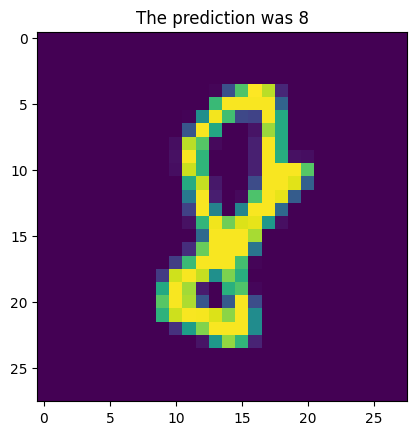

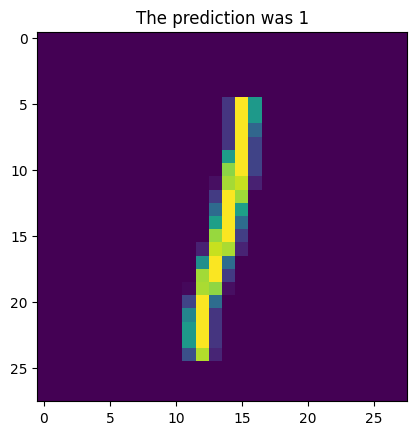

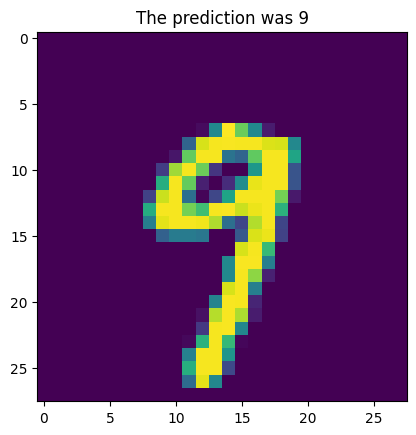

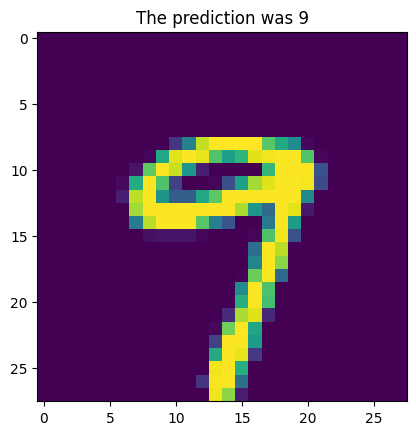

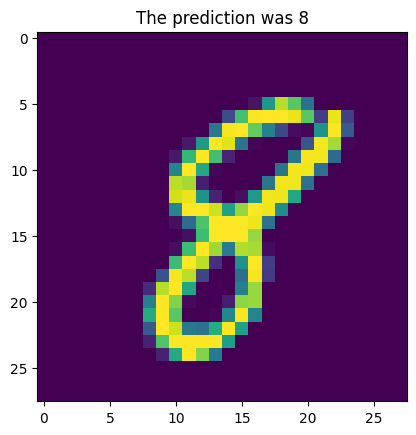

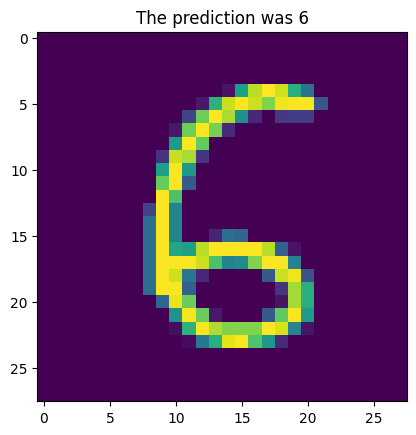

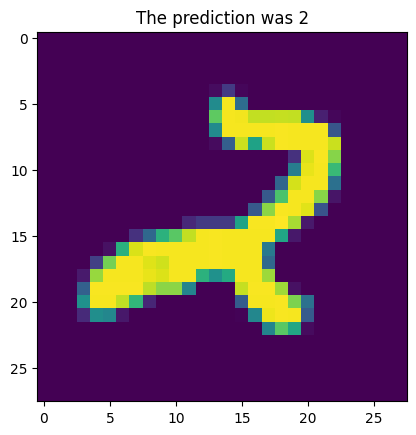

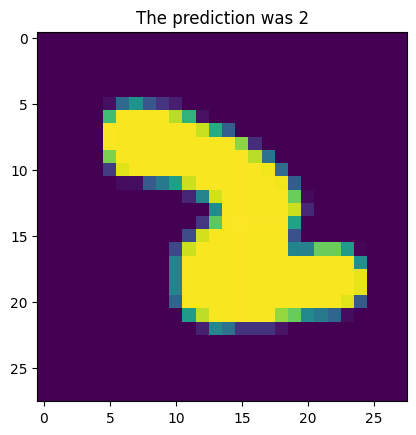

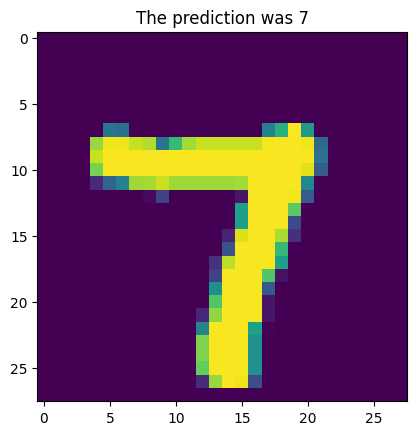

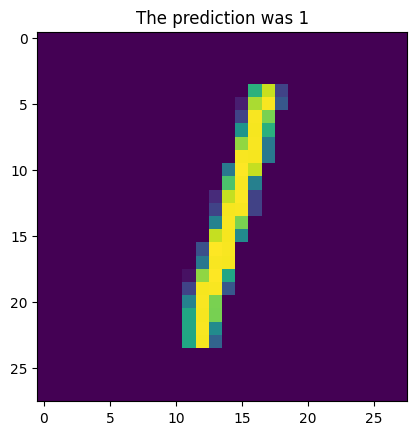

In [96]:
for i in range(10):
  plt.imshow(X_test[i].reshape(28,28))
  plt.title(f'The prediction was {predictions_labels[i]}')
  plt.show()

In [97]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.99      1.00      0.99       909
           2       0.99      0.99      0.99       846
           3       1.00      0.99      0.99       937
           4       0.99      0.98      0.98       839
           5       0.98      0.99      0.99       702
           6       0.99      0.99      0.99       785
           7       0.99      0.99      0.99       893
           8       0.99      0.99      0.99       835
           9       0.98      0.98      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400

